# <center>Georgia Institute of Technology Curricula - College of Engineering</center>

This notebook contains a prelmininary analyses of the curricula and degree plans associated with the undergradatue programs in the College of Engineering at the Georgia Institute of Technology.  In order to execute the analyses provided in this notebook, you need to load the following Julia packages:

In [71]:
using CurricularAnalytics, CurricularVisualization
using CurricularOptimization # this package requires special access rights, if you commented out, you won't be able to run the optimzation-related functions
using Glob
using CSV
using DataFrames
using Statistics

## Curricular Analytics Toolbox

The analyses in this notebook makes use of the Curricular Analytics toolbox built using the Julia programming language and available as open source software [1]. As a starting point, you may find it useful to read the toolbox documenation, as well as the curricular analytics paper listed in the References section below [2].

### Create the Data Structures 
Degree plans associated with the undergraduate programs in the College of Engineering were collected. The degree plans were stored as CSV files using the format for degree plans specified in the Curricular Analytics toolbox.  The files are organized in a directory structure that is assumed to be in the same directory as this notebook as follows:  `./programs/<college-name>/`

Assuming the aforementioned directory structure, we first create an dictionay called `plans` containing the degree plans for each of the programs in a given college, in this case the college of engineering.

In [72]:
college = "engineering"
plans = Dict{String, DegreePlan}()
program_files = glob("*", "./programs/$college")
for program in program_files
    dp = read_csv(program)
    complexity(dp.curriculum)  # compute the curricular complexity of the degree plan
    plans[dp.curriculum.name] = dp    # store the degree plan the dictionary 
end

First we will analyze the structural properties of a curriculum in the college.  The structural properties of a curriculum are determined by the underlying structural properties of its corresponding curriculum graph (i.e., the graph showing the prerequisite relationships between the courses in a curriculum, ignoring term information).  Here's the degree plan for the Electrical Engineering program.  By hovering your mouse over the courses in this figure, various metrics will be displayed.

In [73]:
AE_plan = plans["Aerospace Engineering"]
visualize(AE_plan, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Aerospace Engineering\",\"dp_name\":\"2021-22 Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MATH 1501\",\"metrics\":{\"complexity\":37.0,\"centrality\":0,\"blocking factor\":30,\"delay factor\":7.0},\"nameSub\":\"Calculus I\",\"id\":1,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":2,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 1552\",\"metrics\":{\"complexity\":34.0,\"centrality\":262,\"blocking factor\":27,\"delay factor\":7.0},\"nameSub\":\"Integral Calculus\",\"id\":2,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CHEM 1310\",\"metrics\":{\"complexity\":22.0,\"centrality\":0,\"blocking factor\":16,\"delay factor\":6.0},\"nameSub\":\"General Chemistry\",\"id\":3,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CS 1371\",\"metrics\":{\"complexity\":5.0,\"centrality\":0,\"blocking factor\":2,\"delay factor\":3.0},\"nameSub\":\"Computing for Engineers\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 1101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"English Composition I\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"APPH 1040\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Applied Pysiology\",\"id\":6,\"credits\":2,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 1553\",\"metrics\":{\"complexity\":29.0,\"centrality\":146,\"blocking factor\":22,\"delay factor\":7.0},\"nameSub\":\"Intro to Linear Algebra\",\"id\":7,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"PHYS  2211\",\"metrics\":{\"complexity\":26.0,\"centrality\":96,\"blocking factor\":19,\"delay factor\":7.0},\"nameSub\":\"Intro Physics 1\",\"id\":8,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":9,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"AE 1601\",\"metrics\":{\"complexity\":9.0,\"centrality\":12,\"blocking factor\":5,\"delay factor\":4.0},\"nameSub\":\"Intro To Aerosapce Eng.\",\"id\":9,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":10,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ENGL 1102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"English Composition II\",\"id\":10,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ME 1670\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Intro. To Eng. Graphics\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Social Science Elective\",\"id\":12,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":3},{\"name\":\"Term 4\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":7,\"target_id\":13,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":2,\"target_id\":13,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 2551\",\"metrics\":{\"complexity\":22.0,\"centrality\":146,\"blocking fact

In [74]:
EE_plan = plans["Electrical Engineering - Electronic Devices and Circuit Technology"]
visualize(EE_plan, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Electrical Engineering - Electronic Devices and Circuit Technology\",\"dp_name\":\"2021-22 Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"CHEM 1310\",\"metrics\":{\"complexity\":6.0,\"centrality\":0,\"blocking factor\":3,\"delay factor\":3.0},\"nameSub\":\"General Chemistry\",\"id\":1,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CS 1301\",\"metrics\":{\"complexity\":16.0,\"centrality\":0,\"blocking factor\":10,\"delay factor\":6.0},\"nameSub\":\"Intro to Computing\",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 1100\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ECE Discovery Studio\",\"id\":3,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 1101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"English Composition I\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"MATH 1551\",\"metrics\":{\"complexity\":27.0,\"centrality\":0,\"blocking factor\":19,\"delay factor\":8.0},\"nameSub\":\"Differential Calculus\",\"id\":5,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":6,\"type\":\"CurriculumCorequisite\"}],\"name\":\"MATH 1554\",\"metrics\":{\"complexity\":19.0,\"centrality\":55,\"blocking factor\":12,\"delay factor\":7.0},\"nameSub\":\"Linear Algebra\",\"id\":6,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ECE 2020\",\"metrics\":{\"complexity\":11.0,\"centrality\":41,\"blocking factor\":5,\"delay factor\":6.0},\"nameSub\":\"Fund. of Digital System Design\",\"id\":7,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ENGL 1102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"English Composition II\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":9,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 1552\",\"metrics\":{\"complexity\":25.0,\"centrality\":111,\"blocking factor\":17,\"delay factor\":8.0},\"nameSub\":\"Integral Calculus\",\"id\":9,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":9,\"target_id\":10,\"type\":\"CurriculumCorequisite\"}],\"name\":\"PHYS  2211\",\"metrics\":{\"complexity\":20.0,\"centrality\":46,\"blocking factor\":12,\"delay factor\":8.0},\"nameSub\":\"Intro Physics 1\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"History/Government Elective\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":9,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ECE 2026\",\"metrics\":{\"complexity\":9.0,\"centrality\":11,\"blocking factor\":3,\"delay factor\":6.0},\"nameSub\":\"Intro. to Signal Processing\",\"id\":12,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":

The `basic_metrics()` function can be used to output a set of basic metrics associatd with a curriculum. As an example, here are the basic curricular metrics associated with the Electrical Engineering and Computer Science programs:

In [75]:
metrics = basic_metrics(AE_plan.curriculum)
println(String(take!(metrics)))


Georgia Institute of Technology 
Curriculum: Aerospace Engineering
  credit hours = 137
  number of courses = 48
  Blocking Factor --
    entire curriculum = 209
    max. value = 30, for course(s): MATH 1501 - Calculus I
  Centrality --
    entire curriculum = 1731
    max. value = 262, for course(s): MATH 1552 - Integral Calculus
  Delay Factor --
    entire curriculum = 229.0
    max. value = 7.0, for course(s): MATH 1501 - Calculus I, MATH 1552 - Integral Calculus, MATH 1553 - Intro to Linear Algebra, PHYS  2211 - Intro Physics 1, MATH 2551 - Multivariable Calculus, MATH 2552 - Differential Equations, AE 2010 - Termo and Fluid Fund., AE 2220 - Dynamics, AE 3030 - Aerodynamics, AE 3330 - AE Vehicle Performance, AE 3530 - Sys Dynamics & Vib, AE 3531 - Control Sys Analysis/Design, AE  4341/2/3 - Air/Space/Rotor Design, AE 4531 - Aircraft Flt Dynamics, AE 4532 - Spacecraft Flt Dynamics, AE 4610 - Dynamics & Controls Lab
  Complexity --
    entire curriculum = 438.0
    max. value = 37.

In [76]:
metrics = basic_metrics(EE_plan.curriculum)
println(String(take!(metrics)))


Georgia Institute of Technology 
Curriculum: Electrical Engineering - Electronic Devices and Circuit Technology
  credit hours = 129
  number of courses = 44
  Blocking Factor --
    entire curriculum = 127
    max. value = 19, for course(s): MATH 1551 - Differential Calculus
  Centrality --
    entire curriculum = 792
    max. value = 124, for course(s): ECE 2040 - Circuit Analysis
  Delay Factor --
    entire curriculum = 185.0
    max. value = 8.0, for course(s): MATH 1551 - Differential Calculus, MATH 1552 - Integral Calculus, PHYS  2211 - Intro Physics 1, PHYS  2212 - Intro. Physics 2, ECE 2040 - Circuit Analysis, ECE 3025 - Electromagnetics, Senior Design Sequence, Senior Design Sequence
  Complexity --
    entire curriculum = 312.0
    max. value = 27.0, for course(s): MATH 1551 - Differential Calculus
  Longest Path(s) --
    length = 8, number of paths = 1
    path(s):
    path 1 = MATH 1551 - Differential Calculus -> MATH 1552 - Integral Calculus -> PHYS  2211 - Intro Physic

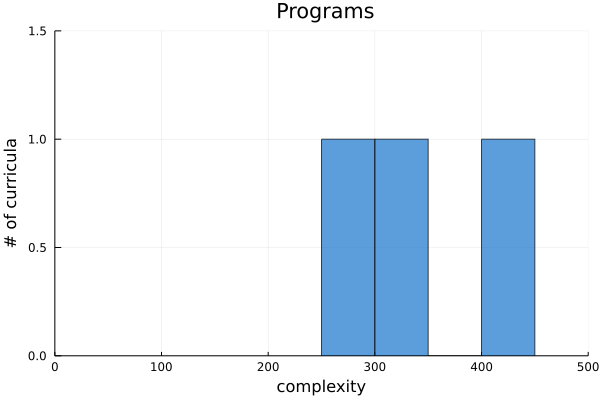

In [77]:
curricula = Array{Curriculum,1}()
metric = "complexity"
for (key, val) in plans
    push!(curricula, val.curriculum)
end
display(metric_histogram(curricula, metric, title=" Programs", xlabel="$(metric)", ylabel="# of curricula", xlim=(0,500)))

# Extraneous Prerequisites
The following function will find prerequisites in a curriculum.  These are redundant prerequisites that are unnecessary in a curriculum.  For example, if a curriculum has the prerequisite 
relationships $c_1 \rightarrow c_2 \rightarrow c_3$ and $c_1 \rightarrow c_3$, and $c_1$ and $c_2$ are 
*not* co-requisites, then $c_1 \rightarrow c_3$ is redundant and therefore extraneous.  Extraneous prerequisites do not effect the curricular complexity metric, they simply are unnecessary clutter in a curriculum or degree plan.

In [78]:
for plan in plans
    extraneous_requisites(plan[2].curriculum, print=true)
end


Georgia Institute of Technology: curriculum Aerospace Engineering has extraneous requisites:
-Statics has redundant requisite Integral Calculus



Georgia Institute of Technology: curriculum Electrical Engineering - Electronic Devices and Circuit Technology has extraneous requisites:
-Digital Design Lab has redundant requisite Fund. of Digital System Design
-Microelectronic Circuits has redundant requisite Differential Equations
-Electromagnetics has redundant requisite Differential Equations
-Measurements, Circuits and Microelectronics Lab has redundant requisite Digital Design Lab



## Dead End Courses
The following function can be used to find "dead end" courses in a curricula.  Dead end courses are those that appear at the end of a path (i.e., sink vertices), and are not a part of a course associated with the major.  E.g., in the case of the ECE curriculum above, these would be courses at the end of a path that do not have the "ECE" or "ENGR" prefix.  One might consider these courses dead ends, as their course outcomes are not (formally) used by any 
major-specific course, i.e., by any course with the prefix "ECE."

In [79]:
prefixes = Dict{String, Array{String,1}}()
prefixes["Electrical Engineering"] = ["ECE"];
prefixes["Electrical Engineering - Electronic Devices and Circuit Technology"] = ["ECE"];
prefixes["Aerospace Engineering"] = ["AE"];

In [80]:
for plan in plans
    de = dead_ends(plan[2].curriculum, prefixes[plan[2].curriculum.name])
    println("\nDead end courses in the $(plan[2].curriculum.name) curriculum:")
    for course in de[2]
        println("$(course.prefix) $(course.num): $(course.name)")
    end
end


Dead end courses in the Aerospace Engineering curriculum:
ENGL 1102: English Composition II
ECE 3741: Circuits /Electronics Lab
AE  4341/2/3: Air/Space/Rotor Design

Dead end courses in the Electrical Engineering curriculum:

Dead end courses in the Electrical Engineering - Electronic Devices and Circuit Technology curriculum:
ENGL 1102: English Composition II


# Degree Plan Optimization 
The Curricular Analytics toolbox contains a number of functions that will create different degree plans for a curriculum depending upon various optimization criteria.  In order to use these functions, you must first install the Gourbi solver, called [Gurobi Optimizer](https://www.gurobi.com/downloads/gurobi-optimizer-eula). Gurobi is a commercial product, and requires a license key; however, [academic licenses](https://www.gurobi.com/downloads/end-user-license-agreement-academic) are available at no cost.

In [81]:
# Uncomment the following two lines if the Gurobi package has not yet been included in your Julia environment.
#using Pkg
#Pkg.add("Gurobi")
using Gurobi

In [82]:
metrics = basic_metrics(EE_plan)
println(String(take!(metrics)))


Curriculum: Electrical Engineering - Electronic Devices and Circuit Technology
Degree Plan: 2021-22 Plan
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 17, in term 1
  min. credits in a term = 14, in term 8
  avg. credits per term = 16.125, with std. dev. = 1.0532687216470449



In [97]:
EE_new_1 = optimize_plan(EE_plan.curriculum, 8, 12, 18, balance_obj);
visualize(EE_new_1, notebook=true)

Academic license - for non-commercial use only
An optimal solution was found with objective value = 14.0


WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Electrical Engineering - Electronic Devices and Circuit Technology\",\"dp_name\":\"\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MATH 1551\",\"metrics\":{\"complexity\":27.0,\"centrality\":0,\"blocking factor\":19,\"delay factor\":8.0},\"nameSub\":\"Differential Calculus\",\"id\":5,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":6,\"type\":\"CurriculumCorequisite\"}],\"name\":\"MATH 1554\",\"metrics\":{\"complexity\":19.0,\"centrality\":55,\"blocking factor\":12,\"delay factor\":7.0},\"nameSub\":\"Linear Algebra\",\"id\":6,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CHEM 1310\",\"metrics\":{\"complexity\":6.0,\"centrality\":0,\"blocking factor\":3,\"delay factor\":3.0},\"nameSub\":\"General Chemistry\",\"id\":1,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CS 1301\",\"metrics\":{\"complexity\":16.0,\"centrality\":0,\"blocking factor\":10,\"delay factor\":6.0},\"nameSub\":\"Intro to Computing\",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Humanities Elective\",\"id\":27,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":9,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 1552\",\"metrics\":{\"complexity\":25.0,\"centrality\":111,\"blocking factor\":17,\"delay factor\":8.0},\"nameSub\":\"Integral Calculus\",\"id\":9,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 3400\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":31,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 1101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"English Composition I\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 4452\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":38,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":9,\"target_id\":10,\"type\":\"CurriculumCorequisite\"}],\"name\":\"PHYS  2211\",\"metrics\":{\"complexity\":20.0,\"centrality\":46,\"blocking factor\":12,\"delay factor\":8.0},\"nameSub\":\"Intro Physics 1\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":10,\"target_id\":16,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"PHYS  2212\",\"metrics\":{\"complexity\":19.0,\"centrality\":46,\"blocking factor\":11,\"delay factor\":8.0},\"nameSub\":\"Intro. Physics 2\",\"id\":16,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ECE 2020\",\"metrics\":{\"complexity\":11.0,\"centrality\":41,\"blocking factor\":5,\"delay factor\":6.0},\"nameSub\":\"Fund. of Digital System Design\",\"id\":7,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Social Science Elective\",\"id\":40,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":15,\"type\":\"CurriculumPrerequisite

In [99]:
metrics = basic_metrics(plan_new)
println(String(take!(metrics)))


Curriculum: Electrical Engineering - Electronic Devices and Circuit Technology
Degree Plan: 
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 17, in term 2
  min. credits in a term = 16, in term 1
  avg. credits per term = 16.125, with std. dev. = 0.33071891388307384



In [107]:
curric = deepcopy(EE_plan.curriculum)
convert_ids(curric)
toxic = Array{Pair{Course,Course},1}()
# Differential Calc is toxic to Linear Algebra
push!(toxic, course(curric, "MATH", "1551", "Differential Calculus", "") => course(curric, "MATH", "1554", "Linear Algebra", ""))

1-element Vector{Pair{Course, Course}}:
 Course(130350880, Dict(1157590204 => 5), "Differential Calculus", 2, "MATH", "1551", "", "", "", Course[], "", Dict{Int64, Requisite}(), LearningOutcome[], Dict{String, Any}("complexity" => 27.0, "centrality" => 0, "blocking factor" => 19, "delay factor" => 8.0), Dict{String, Any}(), 0.5) => Course(2403336617, Dict(1157590204 => 6), "Linear Algebra", 4, "MATH", "1554", "", "", "", Course[], "", Dict{Int64, Requisite}(130350880 => co), LearningOutcome[], Dict{String, Any}("complexity" => 19.0, "centrality" => 55, "blocking factor" => 12, "delay factor" => 7.0), Dict{String, Any}(), 0.5)

In [100]:
EE_new_2 = optimize_plan(EE_plan.curriculum, 8, 12, 18, req_distance_obj);
visualize(EE_new_2, notebook=true)

Academic license - for non-commercial use only
An optimal solution was found with objective value = 35.0


WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Electrical Engineering - Electronic Devices and Circuit Technology\",\"dp_name\":\"\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"ECE 3450\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":30,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Elective Hours\",\"id\":44,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 3400\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":31,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 1101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"English Composition I\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Elective Hours\",\"id\":33,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"APPH 1040\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":26,\"credits\":2,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MATH 1551\",\"metrics\":{\"complexity\":27.0,\"centrality\":0,\"blocking factor\":19,\"delay factor\":8.0},\"nameSub\":\"Differential Calculus\",\"id\":5,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":6,\"type\":\"CurriculumCorequisite\"}],\"name\":\"MATH 1554\",\"metrics\":{\"complexity\":19.0,\"centrality\":55,\"blocking factor\":12,\"delay factor\":7.0},\"nameSub\":\"Linear Algebra\",\"id\":6,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 4452\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":38,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ENGL 1102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"English Composition II\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Social Science Elective\",\"id\":32,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":9,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 1552\",\"metrics\":{\"complexity\":25.0,\"centrality\":111,\"blocking factor\":17,\"delay factor\":8.0},\"nameSub\":\"Integral Calculus\",\"id\":9,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 3005\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":28,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 1100\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ECE Discovery Studio\",\"id\":3,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CS 1301\",\"metrics\":{\"complexity\":16.0,\"ce

In [101]:
metrics = basic_metrics(EE_new_2)
println(String(take!(metrics)))


Curriculum: Electrical Engineering - Electronic Devices and Circuit Technology
Degree Plan: 
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 18, in term 4
  min. credits in a term = 12, in term 2
  avg. credits per term = 16.125, with std. dev. = 1.8328597873268975



In [110]:
EE_new_3 = optimize_plan(EE_plan.curriculum, 8, 12, 18, [balance_obj, req_distance_obj]);
visualize(EE_new_3, notebook=true)

Academic license - for non-commercial use only
An optimal solution was found with objective value = 14.0


WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Electrical Engineering - Electronic Devices and Circuit Technology\",\"dp_name\":\"\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"MATH 1551\",\"metrics\":{\"complexity\":27.0,\"centrality\":0,\"blocking factor\":19,\"delay factor\":8.0},\"nameSub\":\"Differential Calculus\",\"id\":5,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":6,\"type\":\"CurriculumCorequisite\"}],\"name\":\"MATH 1554\",\"metrics\":{\"complexity\":19.0,\"centrality\":55,\"blocking factor\":12,\"delay factor\":7.0},\"nameSub\":\"Linear Algebra\",\"id\":6,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 1101\",\"metrics\":{\"complexity\":3.0,\"centrality\":0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"English Composition I\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ECE 3005\",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"\",\"id\":28,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"History/Government Elective\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Social Science Elective\",\"id\":40,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":9,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 1552\",\"metrics\":{\"complexity\":25.0,\"centrality\":111,\"blocking factor\":17,\"delay factor\":8.0},\"nameSub\":\"Integral Calculus\",\"id\":9,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ENGL 1102\",\"metrics\":{\"complexity\":2.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"English Composition II\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"complexity\":1.0,\"centrality\":0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Elective Hours\",\"id\":39,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"CS 1301\",\"metrics\":{\"complexity\":16.0,\"centrality\":0,\"blocking factor\":10,\"delay factor\":6.0},\"nameSub\":\"Intro to Computing\",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":9,\"target_id\":10,\"type\":\"CurriculumCorequisite\"}],\"name\":\"PHYS  2211\",\"metrics\":{\"complexity\":20.0,\"centrality\":46,\"blocking factor\":12,\"delay factor\":8.0},\"nameSub\":\"Intro Physics 1\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":10,\"target_id\":16,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"PHYS  2212\",\"metrics\":{\"complexity\":19.0,\"centrality\":46,\"blocking factor\":11,\"delay factor\":8.0},\"nameSub\":\"Intro. Physics 2\",\"id\":16,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":9,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ECE 2026\",\"metrics\":{\"complexity\":9.0,\"centrality\":11,\"blocking factor\":3,\"delay factor\":6.0},\"nameSub\":\"Intro. to Signa

In [103]:
metrics = basic_metrics(EE_new_3)
println(String(take!(metrics)))


Curriculum: Electrical Engineering - Electronic Devices and Circuit Technology
Degree Plan: 
  total credit hours = 129
  number of terms = 8
  max. credits in a term = 17, in term 7
  min. credits in a term = 16, in term 1
  avg. credits per term = 16.125, with std. dev. = 0.33071891388307384



In [109]:
EE_new_a = optimize_plan(curric, 8, 12, 18, balance_obj);
visualize(EE_new_a, notebook=true)

Academic license - for non-commercial use only


LoadError: There are no feasbile degree plans.  To create a feasible degree plan, you may need to relax some constraints.

In [111]:
visualize(curric)

Blink.AtomShell.Window(1, Blink.AtomShell.Electron(Process(`/Users/heileman/.julia/packages/Blink/mwJC9/deps/Julia.app/Contents/MacOS/Julia /Users/heileman/.julia/packages/Blink/mwJC9/src/AtomShell/main.js port 6368`, ProcessRunning), Sockets.TCPSocket(RawFD(52) active, 0 bytes waiting), Dict{String, Any}("callback" => Blink.var"#1#2"())), Blink.Page(1, WebSocket(server, CONNECTED), Dict{String, Any}("webio" => Blink.AtomShell.var"#24#25"{Blink.AtomShell.WebIOBlinkComm}(Blink.AtomShell.WebIOBlinkComm(Blink.AtomShell.Window(#= circular reference @-5 =#))), "callback" => Blink.var"#1#2"()), Distributed.Future(1, 1, 1, Some(true))), Task (done) @0x0000000171668ab0)

In [106]:
EE_new_4 = optimize_plan(EE_plan.curriculum, 8, 12, 18, [balance_obj, req_distance_obj], toxic_courses=toxic);
visualize(EE_new_4, notebook=true)

Academic license - for non-commercial use only


LoadError: Vertex ID cannot be found for either course Differential Calculus or Linear Algebra

## References
<a id='References'></a>

[1] Heileman, G. L., Abdallah, C.T., Slim, A., and Hickman, M. (2018). Curricular analytics: A framework for quantifying the impact of curricular reforms and pedagogical innovations. www.arXiv.org, arXiv:1811.09676 [cs.CY].

[2] Heileman, G. L., Free, H. W., Abar, O. and Thompson-Arjona, W. G, (2019). CurricularAnalytics.jl Toolbox. https://github.com/heileman/CurricularAnalytics.jl.